Comparing distributions of functional connectivity between sessions
==========================================================================

Here we compared the functional connectivity (FC) distributions for each session (1-back and 2-back), to exclude possibility that differences in brain topology were driven by the differences in distribution of edge weihts. We presented FC distributions of all subjects (with and without negative edges) and averaged across experimental and control group.

In [1]:
import numpy as np
from nilearn.connectome import sym_matrix_to_vec, vec_to_sym_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing data
data_dir = "/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/02-correlation_matrices/static/dualnback/"
subjects_data = pd.read_csv('../data/behavioral/group_assignment.csv')
subjects_data_clean = subjects_data[subjects_data['group'].isin(['Experimental', 'Control'])].reset_index()

subjects = subjects_data_clean['sub']
sessions = ['ses-1', 'ses-2', 'ses-3', 'ses-4']
conditions = ['1-back', '2-back']
high_motion = ['sub-13', 'sub-21', 'sub-23', 'sub-50'] # Subjects with high motion in at least one session

corr_mat = np.load(f"{data_dir}static_dual_power.npy")

n_sub = corr_mat.shape[0]
n_ses = corr_mat.shape[1]
n_roi = corr_mat.shape[3]

edges = corr_mat[:, :, :, np.tril_indices(n_roi, k=-1)[0], np.tril_indices(n_roi, k=-1)[1]]

print(f'Original data shape: {corr_mat.shape}')
print(f'Edge weights: {edges.shape}')

Original data shape: (46, 4, 2, 264, 264)
Edge weights: (46, 4, 2, 34716)


Plotting individual FC distributions (positive weights)
-------------------------------

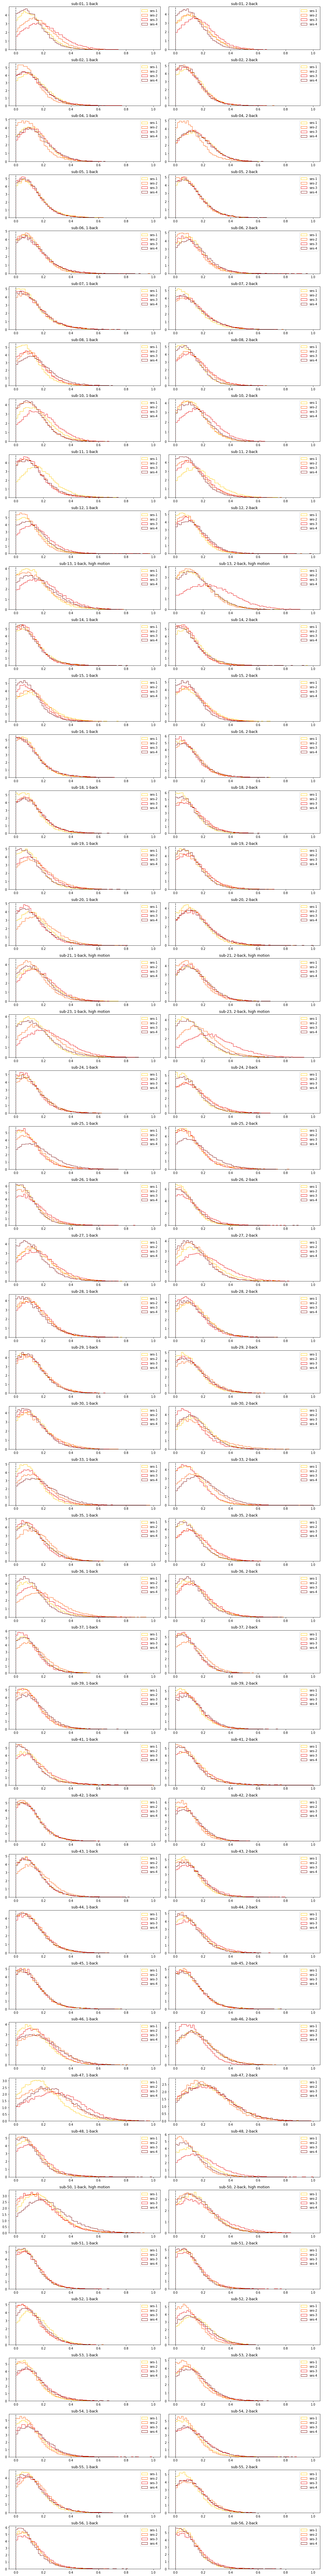

In [96]:
n_bins = 75
cmap = plt.cm.get_cmap('hot_r')
fig, ax = plt.subplots(len(subjects), len(conditions), figsize=(15, 120))

for i, sub in enumerate(subjects):
    for j, ses in enumerate(sessions):
        for c, cond in enumerate(conditions):
            ax[i][c].hist(
                np.squeeze(edges[i, j, c, np.nonzero(edges[i, j, c] > 0)]),
                bins=np.linspace(0, 1, n_bins),
                density=True,
                color=cmap((j/(len(sessions)+2))+2/6),
                histtype='step',
                label=ses
            )
            if sub in high_motion:
                ax[i][c].set_title(sub + ", " + cond + ', high motion')
            else:
                ax[i][c].set_title(sub + ", " + cond)
            ax[i][c].axvline(0, 0, 2, color='gray', linestyle='dashed', linewidth=1.5)
            ax[i][c].legend()
fig.tight_layout()

Plotting group distributions (positive edges)
------------------------------------------------

Text(0.5, 0.98, 'FC distribution for positive edges')

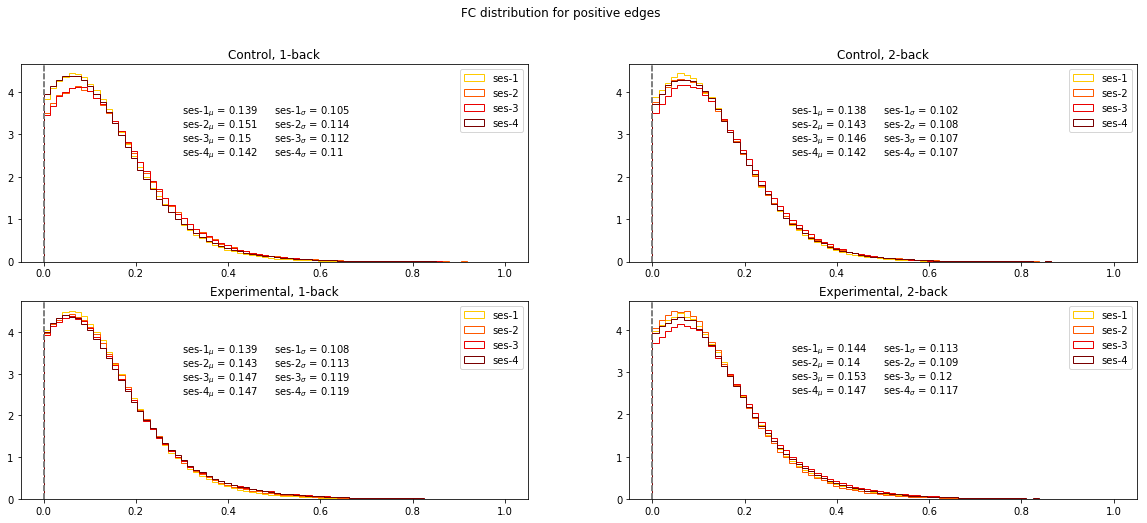

In [109]:
fig, ax = plt.subplots(2, len(conditions), figsize=(20, 8))

for g, group in enumerate(['Control', 'Experimental']):
    for j, ses in enumerate(sessions):
        for c, cond in enumerate(conditions):
            edges_group = edges[(subjects_data_clean['group']==group)&~subjects_data_clean['sub'].isin(high_motion), j, c].flatten()
            edges_values = edges_group[np.nonzero(edges_group > 0)]

            ax[g][c].hist(
                edges_values,
                bins=np.linspace(0, 1, n_bins),
                density=True,
                color=cmap((j/(len(sessions)+2))+2/6),
                histtype='step',
                label=sessions[j]
            )
            ax[g][c].set_title(group + ', ' + cond)
            ax[g][c].axvline(0, 0, 2, color='gray', linestyle='dashed', linewidth=1.5)
            ax[g][c].legend()
            ax[g][c].text(x=0.3, y=3.5-j/3, s=ses+r'$_{\mu}$'+ f' = {round(edges_values.mean(),3)}')
            ax[g][c].text(x=0.5, y=3.5-j/3, s=ses+r'$_{\sigma}$'+ f' = {round(np.std(edges_values),3)}')
fig.suptitle('FC distribution for positive edges')

Plotting individual distributions (all edges)
-------------------------------

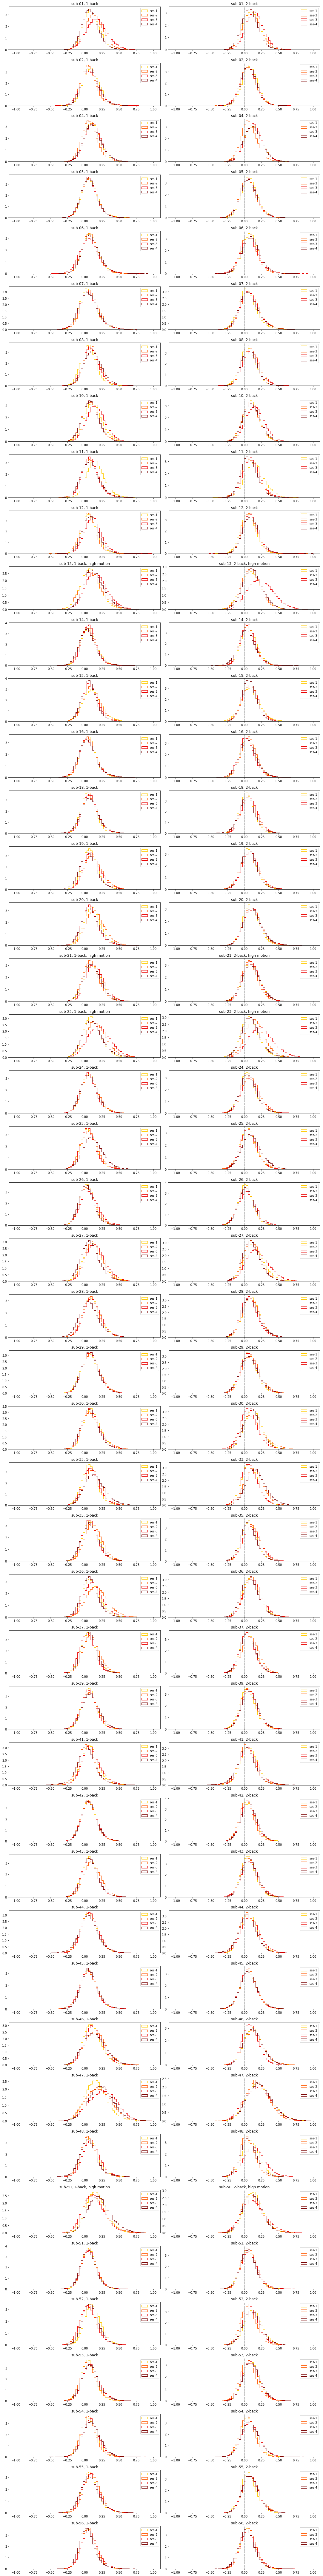

In [11]:
n_bins = 75
cmap = plt.cm.get_cmap('hot_r')
fig, ax = plt.subplots(len(subjects), len(conditions), figsize=(15, 120))

for i, sub in enumerate(subjects):
    for j, ses in enumerate(sessions):
        for c, cond in enumerate(conditions):
            ax[i][c].hist(
                np.squeeze(edges[i, j, c, :]),
                bins=np.linspace(-1, 1, n_bins),
                density=True,
                color=cmap((j/(len(sessions)+2))+2/6),
                histtype='step',
                label=ses
            )
            if sub in high_motion:
                ax[i][c].set_title(sub + ", " + cond + ', high motion')
            else:
                ax[i][c].set_title(sub + ", " + cond)
            ax[i][c].axvline(0, 0, 2, color='gray', linestyle='dashed', linewidth=1)
            ax[i][c].legend()
plt.tight_layout()

Plotting group distributions (all edges)
-------------------------------

Text(0.5, 0.98, 'FC distribution for all edges')

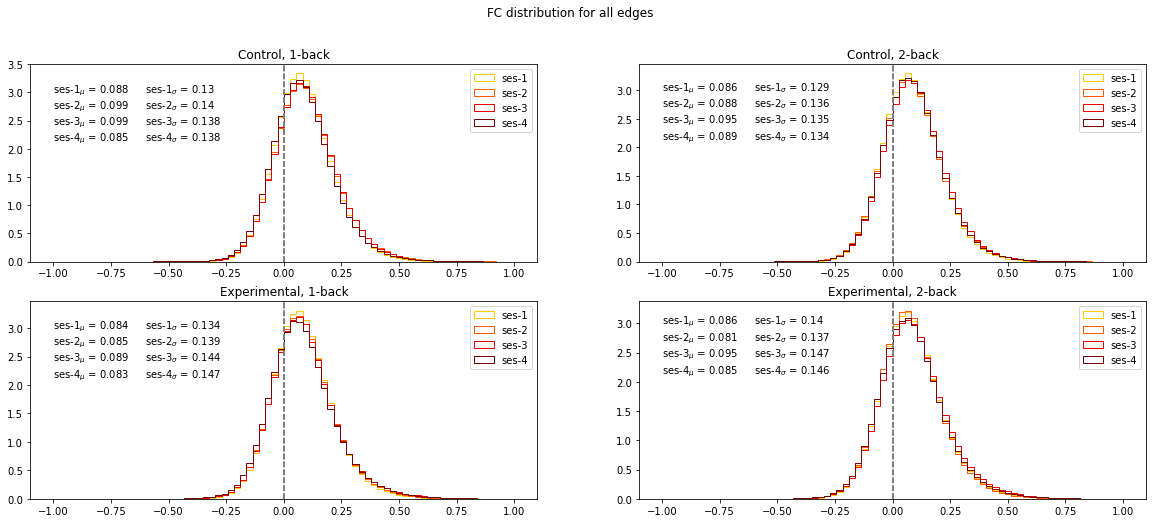

In [108]:
fig, ax = plt.subplots(2, len(conditions), figsize=(20, 8))

for g, group in enumerate(['Control', 'Experimental']):
    for j, ses in enumerate(sessions):
        for c, cond in enumerate(conditions): 
            edges_values = edges[(subjects_data_clean['group']==group)&~subjects_data_clean['sub'].isin(high_motion), j, c].flatten()
            ax[g][c].hist(
                edges_values,
                bins=np.linspace(-1, 1, n_bins),
                density=True,
                color=cmap((j/(len(sessions)+2))+2/6),
                histtype='step',
                label=sessions[j]
            )
            ax[g][c].set_title(group + ', ' + cond)
            ax[g][c].axvline(0, 0, 2, color='gray', linestyle='dashed', linewidth=1.5)
            ax[g][c].legend()
            ax[g][c].text(x=-1, y=3-j/3.5, s=ses+r'$_{\mu}$'+ f' = {round(edges_values.mean(),3)}')
            ax[g][c].text(x=-0.60, y=3-j/3.5, s=ses+r'$_{\sigma}$'+ f' = {round(np.std(edges_values),3)}')

fig.suptitle('FC distribution for all edges') 
